# Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [3]:
train_data = pd.read_csv("house_price_train.csv")

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Preprocessing

In [6]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
data = train_data[['LotFrontage','BedroomAbvGr','FullBath','SalePrice']]

In [8]:
data.columns

Index(['LotFrontage', 'BedroomAbvGr', 'FullBath', 'SalePrice'], dtype='object')

In [9]:
data.head()

,LotFrontage,BedroomAbvGr,FullBath,SalePrice
0,65.0,3,2,208500
1,80.0,3,2,181500
2,68.0,3,2,223500
3,60.0,3,1,140000
4,84.0,4,2,250000


In [10]:
data.describe()

,LotFrontage,BedroomAbvGr,FullBath,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,2.866438,1.565068,180921.195890
std,24.284752,0.815778,0.550916,79442.502883
min,21.000000,0.000000,0.000000,34900.000000
25%,59.000000,2.000000,1.000000,129975.000000
50%,69.000000,3.000000,2.000000,163000.000000
75%,80.000000,3.000000,2.000000,214000.000000
max,313.000000,8.000000,3.000000,755000.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   BedroomAbvGr  1460 non-null   int64  
 2   FullBath      1460 non-null   int64  
 3   SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 45.8 KB


# Handling Missing values

In [13]:
data.isnull().sum()

LotFrontage     259
BedroomAbvGr      0
FullBath          0
SalePrice         0
dtype: int64

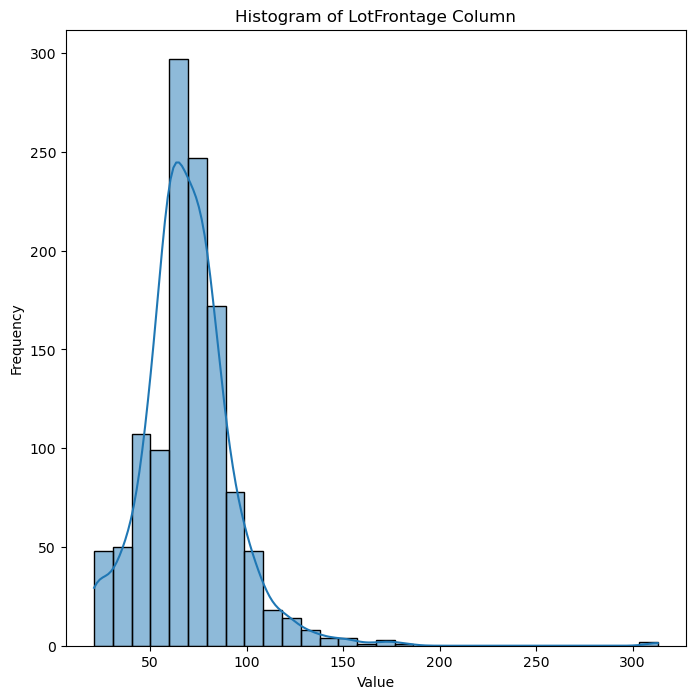

In [14]:
plt.figure(figsize=(8, 8))
sns.histplot(data['LotFrontage'], bins=30, kde=True)  
plt.title('Histogram of LotFrontage Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [15]:
data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)

C:\Users\extra\AppData\Local\Temp\ipykernel_33412\3928895269.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)
C:\Users\extra\AppData\Local\Temp\ipykernel_33412\3928895269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LotFrontage'].fillna(data['LotFrontage'].m

In [16]:
data.isnull().sum()

LotFrontage     0
BedroomAbvGr    0
FullBath        0
SalePrice       0
dtype: int64

# Handling Duplicate values

In [18]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

In [19]:
data.duplicated().sum()

70

In [20]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

In [21]:
data.drop_duplicates(keep='first',inplace=True)

C:\Users\extra\AppData\Local\Temp\ipykernel_33412\1522144980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(keep='first',inplace=True)


In [22]:
data.duplicated().sum()

0

# Seperate Features and target
    Dividing the dataset into independent variables (features) and the dependent variable (target).

In [24]:
x = data[['LotFrontage','BedroomAbvGr','FullBath']]

In [25]:
y = data['SalePrice']

# Splitting the Data

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Data Standardization

In [29]:
scaler = StandardScaler()

In [30]:
x_train = scaler.fit_transform(x_train)

In [31]:
x_test = scaler.transform(x_test)

# Linear Regression model

In [33]:
model = LinearRegression()

# Model Training

In [35]:
model.fit(x_train,y_train)

LinearRegression()

# Predictions on the test set

In [37]:
y_pred = model.predict(x_test)

# Model Evaluation

In [39]:
mse = mean_squared_error(y_test,y_pred)

In [40]:
print("Mean Square Error: ",mse)

Mean Square Error:  3929900975.235139


In [41]:
r2 = r2_score(y_test,y_pred)

In [42]:
print("R2 Score: ",r2)

R2 Score:  0.3597959820405514


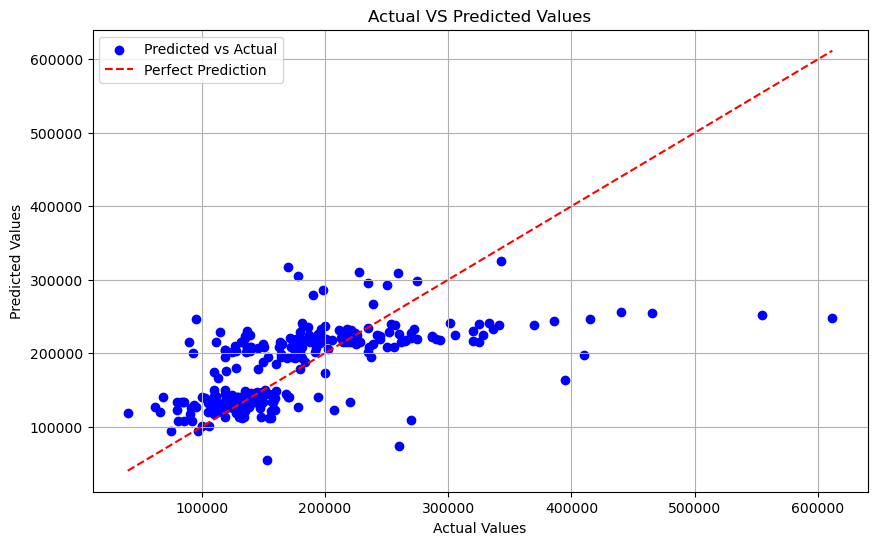

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual VS Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

# Predictions on the unseen test data

In [45]:
test_data = pd.read_csv('house_price_test.csv')

In [46]:
target_data = pd.read_csv('house_price_sample_submission.csv')

In [47]:
test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [48]:
target_data.columns

Index(['Id', 'SalePrice'], dtype='object')

In [49]:
test_data = test_data[['LotFrontage','BedroomAbvGr','FullBath']]

In [50]:
test_data.head()

,LotFrontage,BedroomAbvGr,FullBath
0,80.0,2,1
1,81.0,3,1
2,74.0,3,2
3,78.0,3,2
4,43.0,2,2


# Data Info

In [52]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1232 non-null   float64
 1   BedroomAbvGr  1459 non-null   int64  
 2   FullBath      1459 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 34.3 KB


# Handling Null Values

In [54]:
test_data.isnull().sum()

LotFrontage     227
BedroomAbvGr      0
FullBath          0
dtype: int64

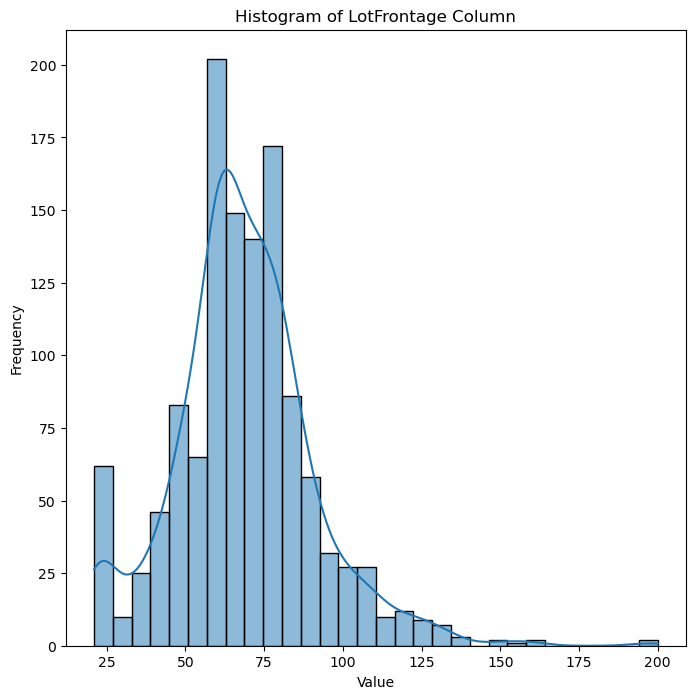

In [55]:
plt.figure(figsize=(8, 8))
sns.histplot(test_data['LotFrontage'], bins=30, kde=True)  
plt.title('Histogram of LotFrontage Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [56]:
test_data['LotFrontage'].fillna(test_data['LotFrontage'].median(), inplace=True)

C:\Users\extra\AppData\Local\Temp\ipykernel_33412\709009332.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['LotFrontage'].fillna(test_data['LotFrontage'].median(), inplace=True)


In [57]:
test_data.isnull().sum()

LotFrontage     0
BedroomAbvGr    0
FullBath        0
dtype: int64

# Data Standardization

In [59]:
test_data_scalar = scaler.transform(test_data)

# Prediction

In [61]:
test_predictions = model.predict(test_data_scalar)

In [62]:
#test_predictions = test_predictions.flatten()

# New Column for the predicted values

In [64]:
print("Type of test_data:", type(test_data_scalar))

Type of test_data: <class 'numpy.ndarray'>


In [65]:
test_data = pd.DataFrame(test_data_scalar, columns=['LotFrontage','BedroomAbvGr','FullBath']) 

In [66]:
print("Type of test_data:", type(test_data))

Type of test_data: <class 'pandas.core.frame.DataFrame'>


In [67]:
test_data.reset_index(drop=True, inplace=True)

In [68]:
if len(test_predictions) == len(test_data):
    test_data['PredictedPrice'] = test_predictions
else:
    print("Length mismatch: Predictions length does not match DataFrame length.")

In [69]:
test_data.head()

,LotFrontage,BedroomAbvGr,FullBath,PredictedPrice
0,0.428941,-1.077843,-1.041379,149961.949161
1,0.473707,0.150191,-1.041379,143827.365044
2,0.160345,0.150191,0.768017,219792.600944
3,0.339409,0.150191,0.768017,223110.539328
4,-1.227403,-1.077843,0.768017,201042.647187


# Evaluation on Unseen test data

In [71]:
print("Length of SalePrice:", len(target_data['SalePrice']))
print("Length of PredictedPrice:", len(test_data['PredictedPrice']))

Length of SalePrice: 1459
Length of PredictedPrice: 1459


In [72]:
print("Missing values in SalePrice:", target_data['SalePrice'].isnull().sum())
print("Missing values in PredictedPrice:", test_data['PredictedPrice'].isnull().sum())

Missing values in SalePrice: 0
Missing values in PredictedPrice: 0


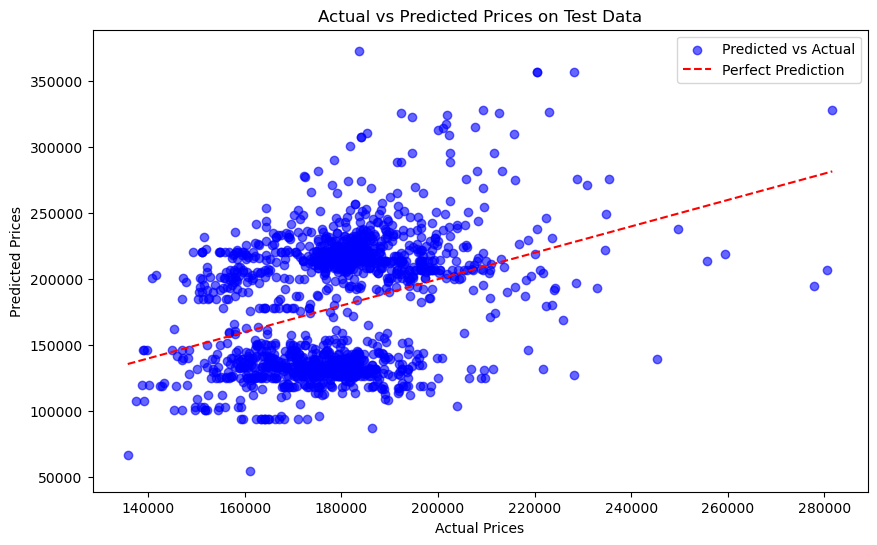

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(target_data['SalePrice'], test_data['PredictedPrice'], alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([target_data['SalePrice'].min(),target_data['SalePrice'].max()], [target_data['SalePrice'].min(), target_data['SalePrice'].max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices on Test Data')
plt.legend()
plt.show()

# Ridge Regression

# Pipeline

In [76]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

In [77]:
param_grid = {
    'ridge__alpha': [0.1, 1, 10, 100],  # Regularization strength
    'poly__degree': [1, 2, 3]  # Degrees of polynomial features
}

# Hyperparameter Tuning

In [79]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'poly__degree': [1, 2, 3],
                         'ridge__alpha': [0.1, 1, 10, 100]},
             scoring='r2')

# Best Parameters

In [81]:
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'poly__degree': 3, 'ridge__alpha': 10}


# Prediction

In [83]:
Y_pred = best_model.predict(x_test)

# Ridge Model Evaluation

In [85]:
mse_ridge = mean_squared_error(y_test,Y_pred)

In [86]:
mse_ridge

5116873293.636374

In [87]:
from sklearn.metrics import r2_score
r2_ridge = r2_score(y_test,Y_pred)

In [88]:
r2_ridge

0.16643119950893936

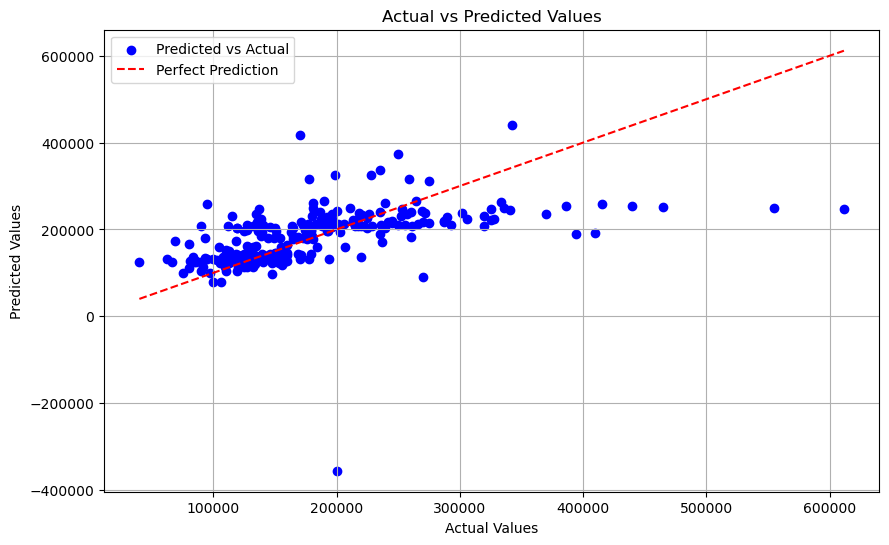

In [89]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, Y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

# Ridge Model on Unseen test Data

In [91]:
test_data.columns

Index(['LotFrontage', 'BedroomAbvGr', 'FullBath', 'PredictedPrice'], dtype='object')

# Prediction

In [93]:
prediction_onUnseen = best_model.predict(test_data[['LotFrontage', 'BedroomAbvGr', 'FullBath']])

C:\Users\extra\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


# New Column for the predicted values (Ridge Model)

In [95]:
if len(prediction_onUnseen) == len(test_data):
    test_data['Ridge_Prediction'] = prediction_onUnseen
else:
    print("Length mismatch: Predictions length does not match DataFrame length.")

In [96]:
test_data.head()

,LotFrontage,BedroomAbvGr,FullBath,PredictedPrice,Ridge_Prediction
0,0.428941,-1.077843,-1.041379,149961.949161,140791.434839
1,0.473707,0.150191,-1.041379,143827.365044,143573.219752
2,0.160345,0.150191,0.768017,219792.600944,215006.790708
3,0.339409,0.150191,0.768017,223110.539328,220572.038383
4,-1.227403,-1.077843,0.768017,201042.647187,188059.189137


# Performance

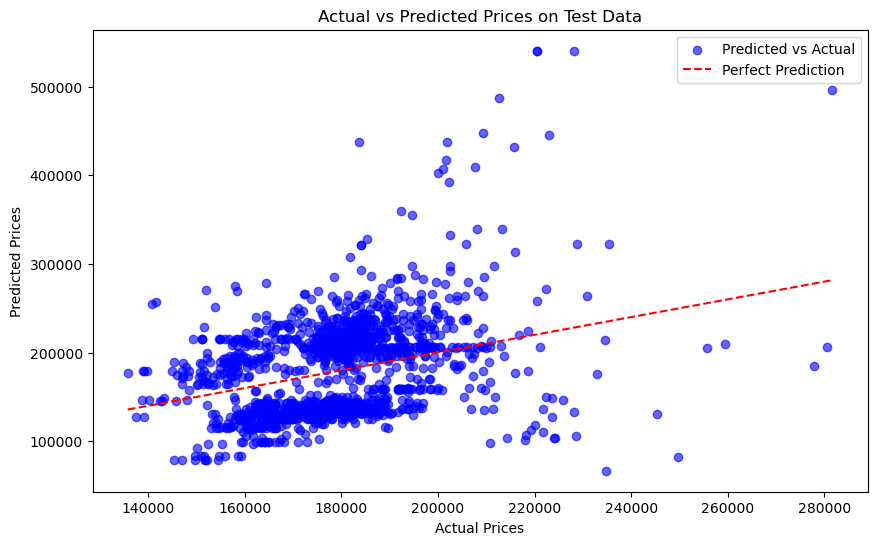

In [98]:
plt.figure(figsize=(10, 6))
plt.scatter(target_data['SalePrice'], test_data['Ridge_Prediction'], alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([target_data['SalePrice'].min(),target_data['SalePrice'].max()], [target_data['SalePrice'].min(), target_data['SalePrice'].max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices on Test Data')
plt.legend()
plt.show()

# Evaluation of both models

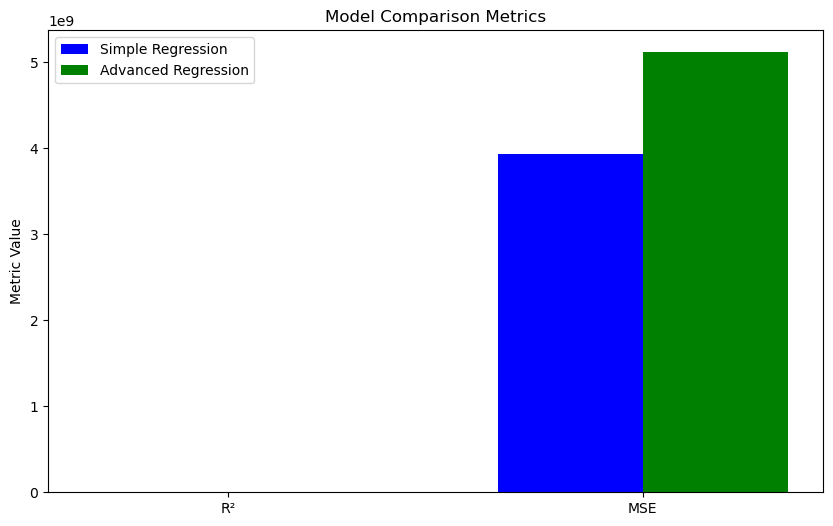

In [100]:
metrics = ['R²', 'MSE']
linear_model_scores = [r2, mse]
ridge_model_scores = [r2_ridge, mse_ridge]

plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(metrics))

plt.bar(x, linear_model_scores, width=bar_width, label='Simple Regression', color='blue')
plt.bar([p + bar_width for p in x], ridge_model_scores, width=bar_width, label='Advanced Regression', color='green')

plt.xticks([p + bar_width / 2 for p in x], metrics)
plt.ylabel('Metric Value')
plt.title('Model Comparison Metrics')
plt.legend()
plt.show()